# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Google) </font>

In [2]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'GOOGL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-10-13,139.380005,140.000000,136.619995,137.360001,137.360001,23420500
2023-10-16,138.169998,139.630005,137.990005,139.100006,139.100006,28501900
2023-10-17,138.630005,139.899994,137.179993,139.720001,139.720001,23515800


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4826 entries, 2004-08-19 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4826 non-null   float64
 1   High       4826 non-null   float64
 2   Low        4826 non-null   float64
 3   Close      4826 non-null   float64
 4   Adj Close  4826 non-null   float64
 5   Volume     4826 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 263.9 KB


In [5]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4.826000e+03
mean,40.977575,41.409022,40.546866,40.986860,40.986860,1.210726e+08
std,37.710560,38.140725,37.300075,37.727800,37.727800,1.497356e+08
min,2.482232,2.546046,2.401401,2.502753,2.502753,9.312000e+06
25%,12.863488,13.004316,12.744244,12.876314,12.876314,3.198700e+07
50%,26.897500,27.117500,26.649250,26.911500,26.911500,6.537656e+07
75%,57.189502,57.669875,56.611250,57.264874,57.264874,1.468140e+08
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.643023e+09


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [7]:
stock_data.shape
# kích thước dữ liệu

(4826, 6)

In [8]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

In [10]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2004-08-19      2.511011
2004-08-20      2.710460
2004-08-23      2.737738
2004-08-24      2.624374
2004-08-25      2.652653
                 ...    
2023-10-13    137.360001
2023-10-16    139.100006
2023-10-17    139.720001
2023-10-18    137.960007
2023-10-19    137.750000
Name: Adj Close, Length: 4826, dtype: float64

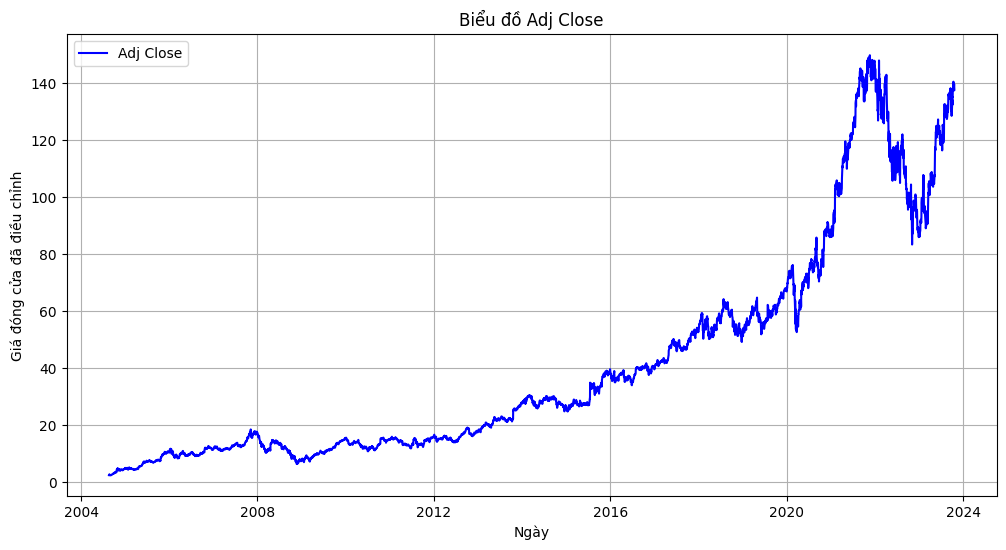

In [11]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Chọn các cột trừ cột 'Adj Close' làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close'])
X

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...
2023-10-13,139.380005,140.000000,136.619995,137.360001,23420500
2023-10-16,138.169998,139.630005,137.990005,139.100006,28501900
2023-10-17,138.630005,139.899994,137.179993,139.720001,23515800


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [13]:
# Chuẩn hóa Min_Max_Scaler cho từng tập dữ liệu X( đầu vào) 
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale.fit(X)
# Lưu mô hình chuẩn hóa vào tệp "minmax_scaler_x.pkl" bằng pickle
import pickle
with open("../Scaler_data/Scaler_Google.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
df_minmax_x = minmax_scale.transform(X)
X_normalizier = pd.DataFrame(df_minmax_x, columns=X.columns, index= X.index) # Chuyển lại về dạng df cho dễ nhìn
X_normalizier

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,0.000136,0.000390,0.000000,0.000056,0.541020
2004-08-20,0.000306,0.001233,0.000776,0.001410,0.273840
2004-08-23,0.001945,0.001972,0.002236,0.001595,0.217793
2004-08-24,0.002027,0.001656,0.001300,0.000825,0.180959
2004-08-25,0.000971,0.001051,0.001353,0.001017,0.106788
...,...,...,...,...,...
2023-10-13,0.920211,0.922507,0.916183,0.915306,0.008636
2023-10-16,0.912078,0.920024,0.925535,0.927115,0.011746
2023-10-17,0.915170,0.921836,0.920005,0.931324,0.008694


In [14]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_normalizier, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(3860, 5)
(966, 5)
(3860,)
(966,)


# <font color = 'red'>3:Huấn luyện mô hình<font>

In [16]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [18]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [19]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 9.080233519733445e-29
R-squared (R2) Score: 1.0
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 8.775873414034786e-29
R-squared (R2) Score: 1.0


In [20]:
print(y_test)

Date
2006-12-19    11.727477
2011-01-21    15.311061
2008-04-09    11.616366
2011-08-26    13.184685
2022-12-09    92.830002
                ...    
2020-10-20    77.554001
2006-05-08     9.879379
2012-06-07    14.470220
2005-10-11     7.660160
2014-11-03    28.188499
Name: Adj Close, Length: 966, dtype: float64


In [21]:
print(y_pred)

[ 11.72747707  15.31106091  11.61636639  13.18468475  92.83000183
  94.62799835  15.80955982  10.37262344 119.51000214 113.91750336
  36.68099976   9.46396446  57.0644989  101.2365036   86.19999695
   9.77202225  13.87712669  27.29450035  27.22550011  56.02700043
   7.72197199   2.56181192 107.51000214  41.92549896  52.72900009
   9.86411381 111.77749634  25.29649925  17.59784889  61.40000153
  53.76549911  11.98999023  13.38738728  11.61336327  25.20050049
 138.66949463   4.39439392  37.9734993  102.72200012   9.491992
  10.13163185  11.78979015  33.5          2.96246195  89.87000275
  25.81456566  16.72947884  11.76201153  38.08000183 142.97149658
  26.45599937  14.0405407   47.42250061   8.10485458   7.01351404
   4.84334278  76.7559967   15.57857895   6.56731701  55.32500076
  88.05400085  29.43149948  12.91341305  15.51826763  62.15000153
 117.30000305 107.33999634  26.45996094  38.21649933  15.25925922
  29.62100029  15.214715    38.04000092  18.56331253  56.79850006
   7.7552552

In [22]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2006-12-19,11.727477,11.727477
2011-01-21,15.311061,15.311061
2008-04-09,11.616366,11.616366
2011-08-26,13.184685,13.184685
2022-12-09,92.830002,92.830002
2021-01-22,94.627998,94.627998
2011-01-19,15.809560,15.809560
2008-09-17,10.372623,10.372623
2023-05-16,119.510002,119.510002


<Axes: xlabel='Date'>

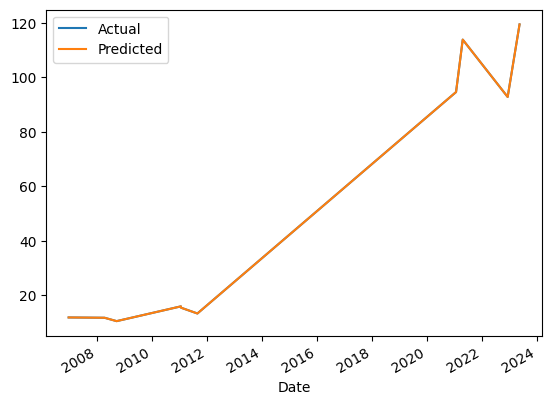

In [23]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [24]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Google.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)